<a href="https://colab.research.google.com/github/gtakhil95/Akhil_INFO5731_Fall2024/blob/main/Gundampalli_Akhil_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

# Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [ ]:
import pandas as pd
from collections import defaultdict
import nltk
from nltk import pos_tag, word_tokenize
from nltk.chunk import RegexpParser

file_path = '/content/sample_data/cleaned_top_10000_abstracts.csv'
data = pd.read_csv(file_path)

abstracts = data['cleaned_abstract_lemmatized'].dropna().tolist()

def generate_ngrams(text, n=3):
    words = text.split()
    return [tuple(words[i:i + n]) for i in range(len(words) - n + 1)]

trigram_counts = defaultdict(int)
for abstract in abstracts:
    trigrams = generate_ngrams(abstract, 3)
    for trigram in trigrams:
        trigram_counts[trigram] += 1

def generate_bigrams(text):
    words = text.split()
    return [tuple(words[i:i + 2]) for i in range(len(words) - 1)]

bigram_counts = defaultdict(int)
unigram_counts = defaultdict(int)

for abstract in abstracts:
    words = abstract.split()
    for word in words:
        unigram_counts[word] += 1
    bigrams = generate_bigrams(abstract)
    for bigram in bigrams:
        bigram_counts[bigram] += 1

bigram_probabilities = {
    bigram: count / unigram_counts[bigram[0]]
    for bigram, count in bigram_counts.items()
}

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def extract_noun_phrases(text):
    words = word_tokenize(text)
    tagged_words = pos_tag(words)
    grammar = "NP: {<DT>?<JJ>*<NN>+}"
    parser = RegexpParser(grammar)
    tree = parser.parse(tagged_words)

    noun_phrases = []
    for subtree in tree.subtrees(filter=lambda t: t.label() == 'NP'):
        phrase = ' '.join(word for word, tag in subtree.leaves())
        noun_phrases.append(phrase.lower())
    return noun_phrases

noun_phrase_counts = defaultdict(int)
review_noun_phrase_counts = []

for abstract in abstracts[:100]:
    review_counts = defaultdict(int)
    noun_phrases = extract_noun_phrases(abstract)
    for phrase in noun_phrases:
        noun_phrase_counts[phrase] += 1
        review_counts[phrase] += 1
    review_noun_phrase_counts.append(review_counts)

max_freq = max(noun_phrase_counts.values())

relative_probabilities = []
for review_counts in review_noun_phrase_counts:
    relative_probs = {phrase: count / max_freq for phrase, count in review_counts.items()}
    relative_probabilities.append(relative_probs)

print(relative_probabilities[:5])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[{'compris': 0.07142857142857142, 'grayscal imag fashion product categori': 0.07142857142857142, 'categori train': 0.07142857142857142, 'imag test': 0.07142857142857142, 'imag fashionmnist intend serv': 0.07142857142857142, 'direct dropin replac': 0.07142857142857142, 'mnist dataset benchmark machin learn': 0.07142857142857142, 'share': 0.07142857142857142, 'imag size': 0.07142857142857142, 'format structur': 0.07142857142857142, 'test split': 0.07142857142857142, 'freeli avail http url': 0.07142857142857142}, {'tensorflow machin learn system': 0.07142857142857142, 'scale heterogen environ tensorflow use': 0.07142857142857142, 'dataflow graph': 0.07142857142857142, 'share state': 0.07142857142857142, 'mutat state map node dataflow graph': 0.07142857142857142, 'mani machin cluster': 0.07142857142857142, 'multipl comput': 0.07142857142857142, 'devic includ multicor cpu generalpurpos gpu customdesign': 0.07142857142857142, 'tensor process unit tpu': 0.07142857142857142, 'give flexibl': 0.

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.


In [ ]:
import pandas as pd
import numpy as np
from collections import defaultdict
import math

file_path = '/content/sample_data/cleaned_top_10000_abstracts.csv'
data = pd.read_csv(file_path)

abstracts = data['cleaned_abstract_lemmatized'].dropna().tolist()

vocab = set()
for abstract in abstracts:
    words = abstract.split()
    vocab.update(words)

vocab = list(vocab)
vocab_index = {word: i for i, word in enumerate(vocab)}

tf_matrix = np.zeros((len(abstracts), len(vocab)))

for doc_id, abstract in enumerate(abstracts):
    word_counts = defaultdict(int)
    words = abstract.split()
    for word in words:
        word_counts[word] += 1

    for word, count in word_counts.items():
        if word in vocab_index:
            tf_matrix[doc_id, vocab_index[word]] = count / len(words)

term_doc_count = defaultdict(int)

for abstract in abstracts:
    unique_terms = set(abstract.split())
    for term in unique_terms:
        term_doc_count[term] += 1

total_docs = len(abstracts)
idf_vector = np.array([
    math.log((total_docs + 1) / (term_doc_count[term] + 1)) + 1 if term in term_doc_count else 0
    for term in vocab
])

tfidf_matrix = tf_matrix * idf_vector

def cosine_similarity(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return dot_product / (norm1 * norm2)

query = "An outstanding movie with a haunting performance and best character development"
query_words = query.lower().split()
query_vector = np.zeros(len(vocab))

for word in query_words:
    if word in vocab_index:
        query_vector[vocab_index[word]] = (query_words.count(word) / len(query_words)) * \
                                          math.log((total_docs + 1) / (term_doc_count[word] + 1)) + 1

cosine_similarities = [cosine_similarity(query_vector, doc_vector) for doc_vector in tfidf_matrix]
ranked_docs = np.argsort(cosine_similarities)[::-1]

print("Top 5 ranked documents:")
for i in range(5):
    doc_index = ranked_docs[i]
    print(f"Document {doc_index + 1} (Similarity: {cosine_similarities[doc_index]:.4f})")
    print(abstracts[doc_index])
    print()


Top 5 ranked documents:
Document 3070 (Similarity: 0.2929)
development robot emerg field locat intersect robot cognit scienc development scienc paper elucid main reason key motiv behind converg field seemingli dispar interest show development robot might prove benefici field involv methodolog advoc synthet twoprong one hand employ robot instanti model origin development scienc hand aim develop better robot system exploit insight gain studi ontogenet develop paper give survey relev research issu point futur research direct

Document 3211 (Similarity: 0.2905)
handdesign intern represent world cannot deal unknown uncontrol environ motiv human cognit behavior develop paper present theori architectur experiment result development robot development robot mean robot gener brain central nervou system includ inform processor control onlin realtim interact environ includ human new selfawar selfeffect sase agent concept propos base sail dav development robot manual autonom develop paradigm formul

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/


Words similar to 'data':
[('nosql', 0.5668364763259888), ('wum', 0.5659369230270386), ('lodap', 0.5609149932861328), ('volumin', 0.5573567748069763), ('abundantli', 0.5556824207305908)]


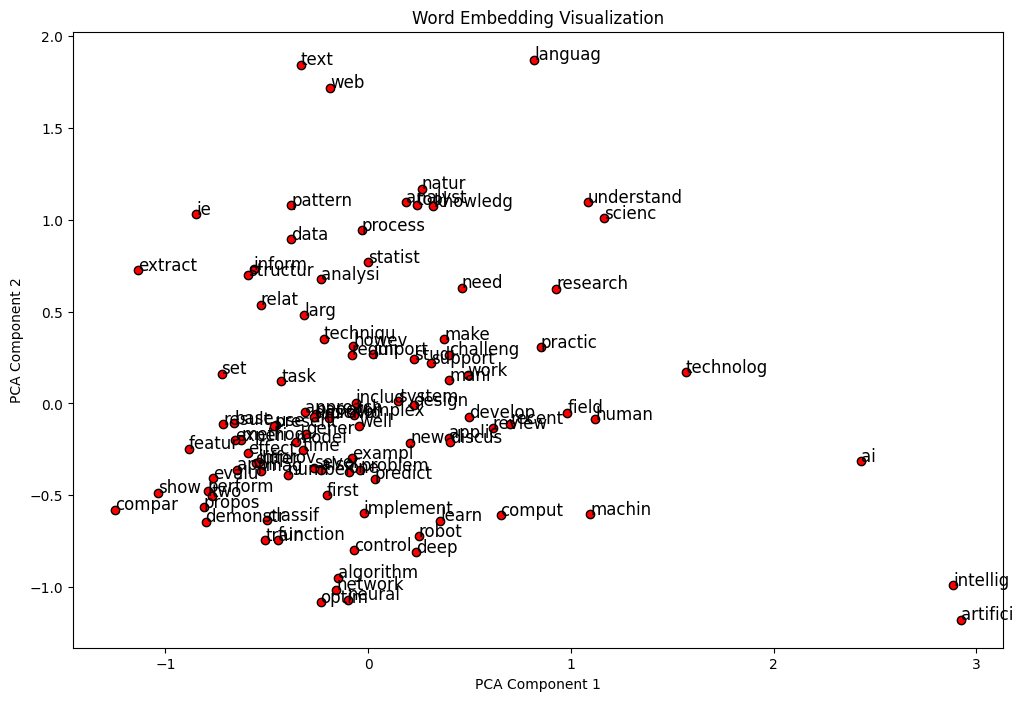

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

file_path = '/content/sample_data/cleaned_top_10000_abstracts.csv'
data = pd.read_csv(file_path)

abstracts = data['cleaned_abstract_lemmatized'].dropna().tolist()
sentences = [abstract.split() for abstract in abstracts]

model = Word2Vec(sentences, vector_size=300, window=5, min_count=2, sg=1, epochs=10, workers=4)

model.save("word2vec_300.model")

print("Words similar to 'data':")
print(model.wv.most_similar('data', topn=5))

words = list(model.wv.index_to_key)[:100]
word_vectors = model.wv[words]

pca = PCA(n_components=2)
word_vectors_2d = pca.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')

for i, word in enumerate(words):
    plt.text(word_vectors_2d[i, 0], word_vectors_2d[i, 1], word, fontsize=12)

plt.title('Word Embedding Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [1]:
import pandas as pd
import os
from google.colab import files

file_path = '/content/sample_data/cleaned_top_10000_abstracts.csv'
data = pd.read_csv(file_path)

data['document_id'] = data.index
data['sentiment'] = ''

print("Sample data for annotation:")
print(data[['document_id', 'cleaned_abstract_lemmatized']].head(10))

output_path = '/content/annotated_sentiment_dataset.csv'
data[['document_id', 'cleaned_abstract_lemmatized', 'sentiment']].to_csv(output_path, index=False)

print(f"Annotated dataset template saved to {output_path}. Please open this CSV file and fill in the 'sentiment' column manually.")

files.download(output_path)


Sample data for annotation:
   document_id                        cleaned_abstract_lemmatized
0            0  present fashionmnist new dataset compris x gra...
1            1  tensorflow machin learn system oper larg scale...
2            2  tensorflow interfac express machin learn algor...
3            3                                                NaN
4            4  goal precipit nowcast predict futur rainfal in...
5            5                                                NaN
6            6  widespread use artifici intellig ai system app...
7            7  present open graph benchmark ogb diver set cha...
8            8  machin learn address question build comput imp...
9            9                                                NaN
Annotated dataset template saved to /content/annotated_sentiment_dataset.csv. Please open this CSV file and fill in the 'sentiment' column manually.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Github Link:
https://github.com/gtakhil95/Akhil_INFO5731_Fall2024/blob/main/annotated_sentiment_dataset.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.


This assignment was both a challenging and rewarding experience, offering valuable insights into the complexities of natural language processing (NLP). I found the tasks that required developing solutions from scratch particularly difficult, but they played a crucial role in deepening my understanding of NLP’s core principles and techniques. A highlight of the assignment was constructing and visualizing word embeddings. This hands-on task allowed me to see firsthand how word relationships and meanings could be represented in a computational form. The timeline provided for the assignment was reasonable, and by managing my time well, I was able to approach each task carefully and complete the work efficiently. In the end, this experience greatly contributed to expanding my knowledge and skills in NLP.